<a href="https://colab.research.google.com/github/tian2992/notebooks_dateros/blob/master/Scraping%20con%20bs%20y%20requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [ ]:
import pandas

In [ ]:
url__ratings = 'https://www.allsides.com/media-bias/media-bias-ratings'

In [ ]:
r = requests.get(url__ratings)


In [ ]:
r.content[:100]

b'<!DOCTYPE html>\n<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->\n<!--[if lte'

In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')

In [ ]:
soup.select_one("title")

<title>Media Bias Ratings AllSides</title>

In [ ]:
soup.select_one("table.views-table > tbody")

In [ ]:
rows = soup.select('tbody tr')

In [ ]:
rows[0].select_one('.source-title').text.strip()

'ABC News (Online)'

In [ ]:
row = rows[5]

In [ ]:
row.select_one('.source-title').text.strip()

'BBC News'

In [ ]:
allsides_page = row.select_one('.source-title a')['href']

In [ ]:
allsides_page = 'https://www.allsides.com' + allsides_page

In [ ]:
bias = row.select_one('.views-field-field-bias-image a')['href']
bias = bias.split('/')[-1]

print(bias)

center


In [ ]:
agree = int(row.select_one('.agree').text)
disagree = int(row.select_one('.disagree').text)
agree_ratio = agree / disagree

print(f"Agree: {agree}, Disagree: {disagree}, Ratio {agree_ratio:.2f}")

Agree: 27695, Disagree: 23754, Ratio 1.17


In [ ]:
agree

27695

In [ ]:
print(row.select_one('.community-feedback-rating-page'))

None


In [ ]:
def get_agreeance_text(ratio):
    if ratio > 3: return "absolutely agrees"
    elif 2 < ratio <= 3: return "strongly agrees"
    elif 1.5 < ratio <= 2: return "agrees"
    elif 1 < ratio <= 1.5: return "somewhat agrees"
    elif ratio == 1: return "neutral"
    elif 0.67 < ratio < 1: return "somewhat disagrees"
    elif 0.5 < ratio <= 0.67: return "disagrees"
    elif 0.33 < ratio <= 0.5: return "strongly disagrees"
    elif ratio <= 0.33: return "absolutely disagrees"
    else: return None

data = []

for row in rows:
    d = dict()

    d['name'] = row.select_one('.source-title').text.strip()
    d['allsides_page'] = 'https://www.allsides.com' + row.select_one('.source-title a')['href']
    d['bias'] = row.select_one('.views-field-field-bias-image a')['href'].split('/')[-1]
    d['agree'] = int(row.select_one('.agree').text)
    d['disagree'] = int(row.select_one('.disagree').text)
    d['agree_ratio'] = d['agree'] / d['disagree']
    d['agreeance_text'] = get_agreeance_text(d['agree_ratio'])

    data.append(d)

In [ ]:
data

In [ ]:
agree_disagree = pandas.DataFrame(data)

In [ ]:
agree_disagree

,name,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text
0,ABC News (Online),https://www.allsides.com/news-source/abc-news-...,left-center,33390,17034,1.960197,agrees
1,AlterNet,https://www.allsides.com/news-source/alternet-...,left,12621,2574,4.903263,absolutely agrees
2,AP Politics & Fact Check,https://www.allsides.com/news-source/ap-fact-c...,left-center,3893,4630,0.840821,somewhat disagrees
3,Associated Press,https://www.allsides.com/news-source/associate...,center,25091,18956,1.323644,somewhat agrees
4,Axios,https://www.allsides.com/news-source/axios,center,5220,5525,0.944796,somewhat disagrees
5,BBC News,https://www.allsides.com/news-source/bbc-news-...,center,27695,23754,1.165909,somewhat agrees
6,Bloomberg,https://www.allsides.com/news-source/bloomberg...,left-center,14997,20335,0.737497,somewhat disagrees
7,Breitbart News,https://www.allsides.com/news-source/breitbart,right,37442,10854,3.449604,absolutely agrees
8,BuzzFeed News,https://www.allsides.com/news-source/buzzfeed-...,left,22958,8937,2.568871,strongly agrees
9,CBS News (Online),https://www.allsides.com/news-source/cbs-news-...,left-center,17982,11474,1.567195,agrees


In [ ]:
agree_disagree.set_index("name", inplace=True)

In [ ]:
agree_disagree

,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text
name,,,,,,
ABC News (Online),https://www.allsides.com/news-source/abc-news-...,left-center,33390,17034,1.960197,agrees
AlterNet,https://www.allsides.com/news-source/alternet-...,left,12621,2574,4.903263,absolutely agrees
AP Politics & Fact Check,https://www.allsides.com/news-source/ap-fact-c...,left-center,3893,4630,0.840821,somewhat disagrees
Associated Press,https://www.allsides.com/news-source/associate...,center,25091,18956,1.323644,somewhat agrees
Axios,https://www.allsides.com/news-source/axios,center,5220,5525,0.944796,somewhat disagrees
BBC News,https://www.allsides.com/news-source/bbc-news-...,center,27695,23754,1.165909,somewhat agrees
Bloomberg,https://www.allsides.com/news-source/bloomberg...,left-center,14997,20335,0.737497,somewhat disagrees
Breitbart News,https://www.allsides.com/news-source/breitbart,right,37442,10854,3.449604,absolutely agrees
BuzzFeed News,https://www.allsides.com/news-source/buzzfeed-...,left,22958,8937,2.568871,strongly agrees


In [ ]:
elp_ = "https://elperiodico.com.gt/nacionales/2021/05/28/fiscalia-impugna-resolucion-que-favorecio-a-patricia-marroquin-de-morales/"

In [ ]:
r_elp = requests.get(elp_)

In [ ]:
elp_doc = BeautifulSoup(r.content, 'html.parser')

In [ ]:
elp_doc.select(".panel-content > section > div > a")

[<a class="post-thumbnail " href="https://elperiodico.com.gt/opinion/opiniones-de-hoy/2021/03/25/un-busto-digno-de-su-grandeza/">
 <img alt="noticia" src="https://d25nlln9isiu5y.cloudfront.net/wp-content/uploads/2020/10/11192408/miguel-angel-alvizures.jpg"/>
 <span class="credit">Miguel Ángel Albizures</span>
 </a>,
 <a class="post-thumbnail " href="https://elperiodico.com.gt/noticias/domingo/2021/05/23/temporada-alta-en-turismo-de-vacunas/">
 <img alt="noticia" src="https://d25nlln9isiu5y.cloudfront.net/wp-content/uploads/2021/05/22205200/FOTO-PARA-DOMINGO-NOTA-DE-CINDY-Archivo-1024x576.jpg"/>
 <span class="credit">Cindy Espina cespina@elperiodico.com.gt</span>
 </a>,
 <a class="post-thumbnail " href="https://elperiodico.com.gt/cultura/artediseno/2021/01/12/artistas-retratan-toma-del-capitolio-de-e-uu-con-caricaturas/">
 <img alt="noticia" src="https://d25nlln9isiu5y.cloudfront.net/wp-content/uploads/2021/01/12154804/WhatsApp-Image-2021-01-12-at-9.40.44-AM.jpeg"/>
 <span class="credit

In [ ]:
a1 = elp_doc.select(".panel-content > section > div > a")[0]

In [ ]:
a1.attrs['href']

'https://elperiodico.com.gt/opinion/opiniones-de-hoy/2021/03/25/un-busto-digno-de-su-grandeza/'



---



In [ ]:
abs_agree = [d for d in data if d['agree_ratio'] > 2]

print(f"{'Outlet':<20} {'Bias':<20}")
print("-" * 30)

for d in abs_agree:
    print(f"{d['name']:<20} {d['bias']:<20}")

Outlet               Bias                
------------------------------
AlterNet             left                
Breitbart News       right               
BuzzFeed News        left                
CNN (Opinion)        left                
Daily Beast          left                
Democracy Now        left                
Fox News (Opinion)   right               
Mother Jones         left                
MSNBC                left                
National Review      right               
New York Times (Opinion) left                
Slate                left                
The American Spectator right               
The Daily Caller     right               
The Daily Wire       right               
The Epoch Times      right-center        
The Federalist       right               
The Intercept        left                
The New Yorker       left                


In [ ]:
agree_disagree['total_votes'] = agree_disagree['agree'] + agree_disagree['disagree']


In [ ]:
agree_disagree.sort_values('agree_ratio', ascending=False, inplace=True)
agree_disagree.head(10)

,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text,total_votes
name,,,,,,,
TheBlaze.com,https://www.allsides.com/news-source/theblaze-...,right,97202,78816,1.233278,somewhat agrees,176018
CNN (Online News),https://www.allsides.com/news-source/cnn-media...,left,48085,46748,1.028600,somewhat agrees,94833
Fox News (Online News),https://www.allsides.com/news-source/fox-news-...,right,39413,46064,0.855614,somewhat disagrees,85477
New York Times (News),https://www.allsides.com/news-source/new-york-...,left-center,27730,37486,0.739743,somewhat disagrees,65216
NPR (Online News),https://www.allsides.com/news-source/npr-media...,center,30532,27923,1.093436,somewhat agrees,58455
HuffPost,https://www.allsides.com/news-source/huffpost-...,left,34235,21999,1.556207,agrees,56234
Politico,https://www.allsides.com/news-source/politico-...,left-center,22506,29355,0.766684,somewhat disagrees,51861
BBC News,https://www.allsides.com/news-source/bbc-news-...,center,27695,23754,1.165909,somewhat agrees,51449
ABC News (Online),https://www.allsides.com/news-source/abc-news-...,left-center,33390,17034,1.960197,agrees,50424


In [ ]:
import matplotlib.pyplot as plt
import seaborn 
plt.style.use('seaborn-darkgrid')


In [ ]:
top_agree = agree_disagree.head(25).copy()

top_agree.sort_values('agree_ratio', ascending=False, inplace=True)

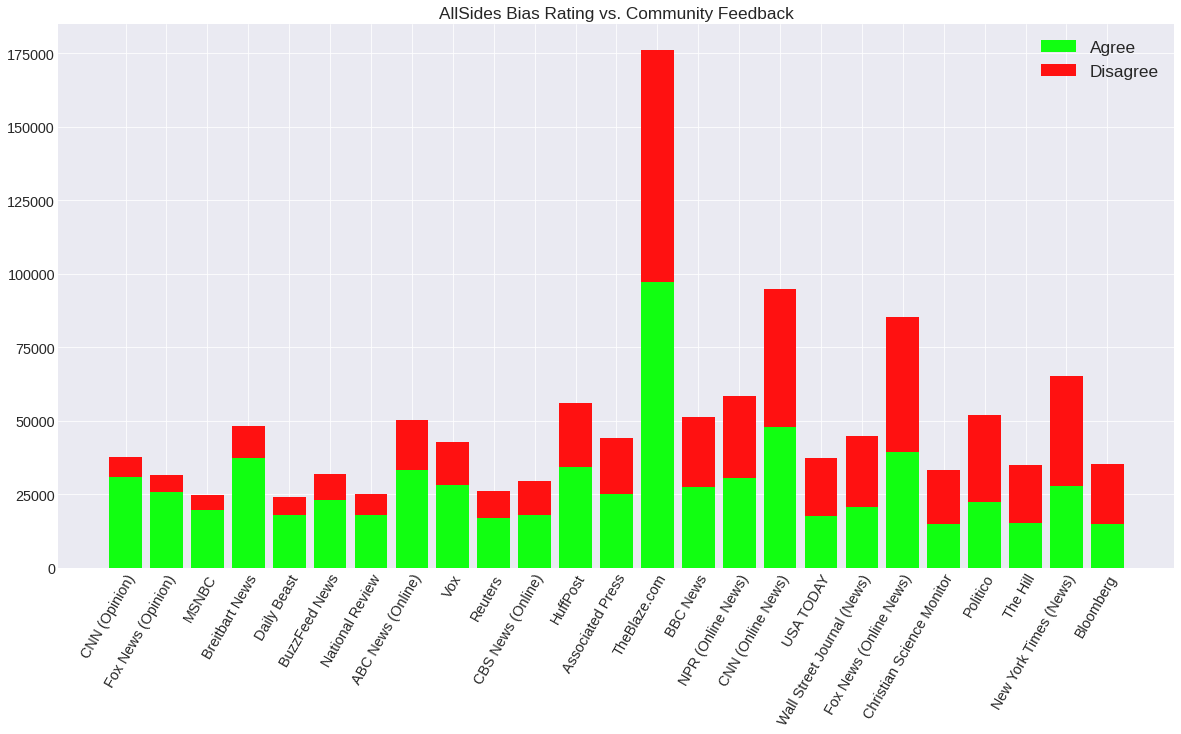

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(top_agree.index, top_agree['agree'], color="#1F1")
ax.bar(top_agree.index, top_agree['disagree'], color="#F11", bottom=top_agree['agree'])

ax.set_ylabel = 'Total feedback'

plt.yticks(fontsize='x-large')
plt.xticks(rotation=60, ha='right', fontsize='x-large', rotation_mode='anchor')

plt.legend(['Agree', 'Disagree'], fontsize='xx-large')
plt.title('AllSides Bias Rating vs. Community Feedback', fontsize='xx-large')
plt.show()

